#### Import the required libraries we need for the lab.


In [45]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [46]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [47]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [48]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [49]:
#TASK 1
# Question 1 : Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Question 2 : Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Question 3 : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Question 4 : What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# TASK 2
# Question 1 : For the "Median value of owner-occupied homes" provide a boxplot
# Question 2 : Provide a  bar plot for the Charles river variable
# Question 3 : Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# Question 4 : Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
# Question 5 : Create a histogram for the pupil to teacher ratio variable

In [50]:
#TASK 1 - Question 1
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [51]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1].median(),
                   boston_df[boston_df['CHAS'] == 0].median(), equal_var = True)

TtestResult(statistic=-0.071001919781937, pvalue=0.9439395612421011, df=26.0)

Hypothesis Statements

H₀ (null hypothesis): There is no differences between median value of houses bounded by the Charles river.

H₁ (alternative hypothesis): This means there differences between median value of houses bounded by the Charles river.

Answer: because pvalue > alpha(0,05), then we fail to reject null hypotheses. 
Differences between median value of houses bounded by the Charles river or not is not statistically significant
There is not enough statistical evidence at the 5% significance level to conclude there is a significant difference (or effect). 

In [52]:
#TASK 1 - Question 2
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis Statements 

H₀ (null hypothesis): There is no differences of median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940significant impact of the distance to employment centers on the median value of homes.

H₁ (alternative hypothesis): This means there is differences of median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 significant impact of the distance to employment centers on the median value of homes

In [53]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [54]:
lower_45 = boston_df[boston_df['AGE'] < 45].median()
between_45_77 = boston_df[(boston_df['AGE'] >= 45) & (boston_df['AGE'] <= 77)].median()
bigger_77 = boston_df[boston_df['AGE'] > 77].median()

In [55]:
f_statistic, p_value = scipy.stats.f_oneway(lower_45, between_45_77, bigger_77)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 0.13831371142220802, P-Value: 0.8712507218522614


Answer: because pvalue > alpha(0,05), then we fail to reject null hypotheses.

Differences between Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940s or not is not statistically significant. 
There is not enough statistical evidence at the 5% significance level to conclude there is a significant difference (or effect). 

In [56]:
#TASK 1 - Question 3
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [57]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Hypothesis Statements 

H₀ (null hypothesis): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

H₁ (alternative hypothesis): This means there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Answer: because pvalue < alpha(0,05), then we reject null hypotheses. 
The correlation coefficient of 0.764 indicates a strong positive linear relationship.
The relationship between Nitric oxide concentrations and proportion of non-retail business acres per town is statistically significant or correlated
At the 5% significance level, we conclude there is a significant difference (or effect). 

In [58]:
#TASK 2 - Question 4
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [59]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.21e-08
Time:                        23:29:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hypothesis Statements 

H₀ (null hypothesis): There is no relationship additional weighted distance to the five Boston employment centres on the median value of owner occupied homes .

H₁ (alternative hypothesis): This means there is relationship additional weighted distance to the five Boston employment centres on the median value of owner occupied homes 

Answer: because pvalue < alpha(0,05), then we reject null hypotheses. 
The relationship between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is statistically significant or correlated
At the 5% significance level, we conclude there is a significant difference (or effect). 

In [60]:
#TASK 1 - Question 1
# For the "Median value of owner-occupied homes" provide a boxplot

In [61]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
q25 = np.quantile(boston_df["MEDV"],0.25)
q75 = np.quantile(boston_df["MEDV"],0.75)
iqr = q75 - q25

lower = q25 - 1.5 * iqr
upper = q75 + 1.5 * iqr

In [63]:
boston_df_filter = boston_df[(boston_df["MEDV"] >= lower) & (boston_df["MEDV"] <= upper)]
boston_df_filter

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


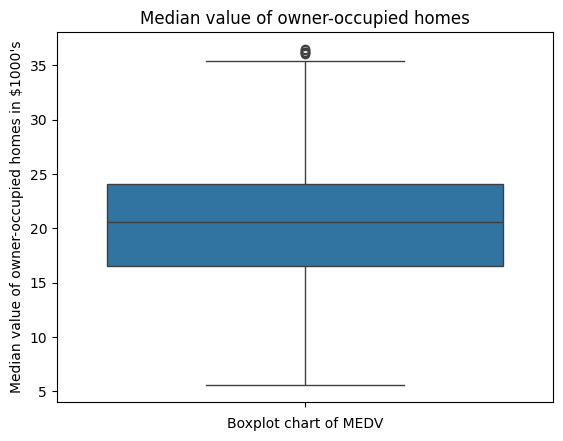

In [64]:
ax = sns.boxplot(y="MEDV", data=boston_df_filter)
plt.xlabel("Boxplot chart of MEDV")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.title("Median value of owner-occupied homes")

plt.show()

There are some ooutiers for MEDV value, the meadian values lies around $21.000 

In [65]:
#TASK 2 - Question 2
# Provide a  bar plot for the Charles river variable

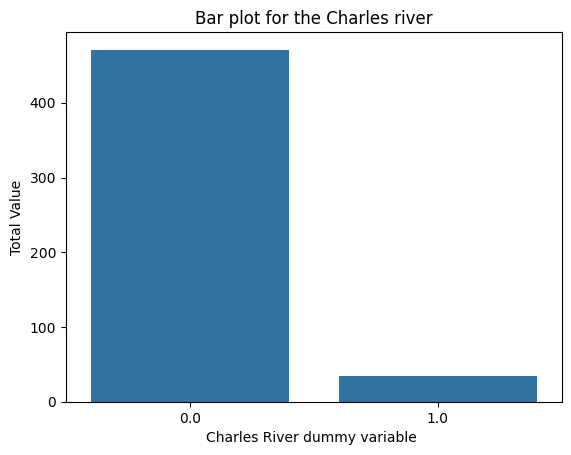

In [66]:
sns.countplot(x="CHAS", data=boston_df)

plt.xlabel("Charles River dummy variable ")
plt.ylabel("Total Value")
plt.title("Bar plot for the Charles river")

plt.show()

Total of Charles River dummy variable that tract doest not bounds river is significantly higher than not bounded by river

In [67]:
#TASK 2 - Question 3
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [68]:
#lower_35 = boston_df_filter[boston_df_filter['AGE'] < 35]
#between_35_70 = boston_df_filter[(boston_df_filter['AGE'] >= 35) & (boston_df_filter['AGE'] <= 70)]
#bigger_70 = boston_df_filter[boston_df_filter['AGE'] > 70]

In [69]:
def condition(value):
    if value < 35:
      return 'lower_35'
    elif value > 70:
      return 'bigger_70'
    else:
        return 'between_35_70'

In [70]:
boston_df_filter['AGE_CAT'] = boston_df_filter['AGE'].apply(condition)

<ipython-input-70-89b9cf898cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df_filter['AGE_CAT'] = boston_df_filter['AGE'].apply(condition)


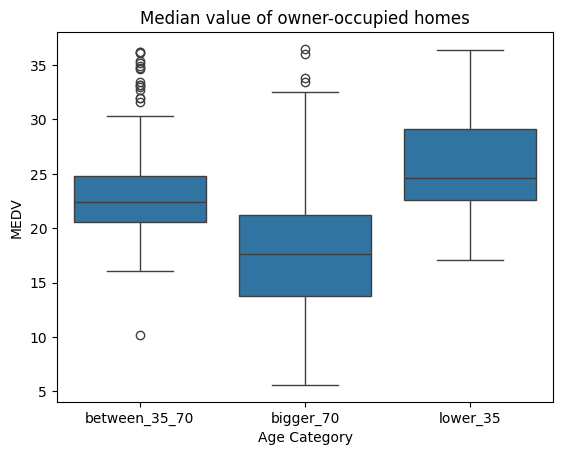

In [71]:
sns.boxplot(y="MEDV", x= "AGE_CAT", data=boston_df_filter)
plt.xlabel("Age Category")
plt.ylabel("MEDV")
plt.title("Median value of owner-occupied homes")
plt.show()

This boxplot chart indicate that owner age that occupied houses which age lower than 35 shows relatively higher median value than other group age
Also from this boxplot MEDV of 35 - 70 age group shows more frequent outliers compare to other groups

In [72]:
#TASK 2 - Question 4
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

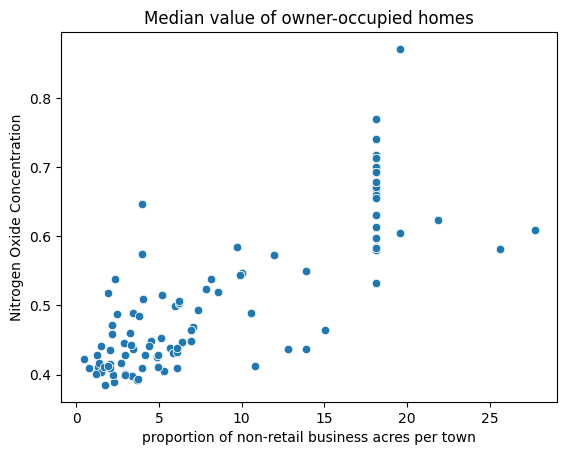

In [73]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
np.corrcoef(boston_df['INDUS'], boston_df['NOX'])
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Nitrogen Oxide Concentration")
plt.title("Median value of owner-occupied homes")
plt.show()


In [74]:
## X is the input variables (or independent variables)
X = boston_df['INDUS']
## y is the target/dependent variable
y = boston_df['NOX']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 15 May 2025   Prob (F-statistic):           7.91e-98
Time:                        23:29:02   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: there is moderate linear relationship power between Nitric oxide concentrations and the proportion of non-retail business acres per town

In [75]:
# #TASK 2 - Question 5
# Create a histogram for the pupil to teacher ratio variable

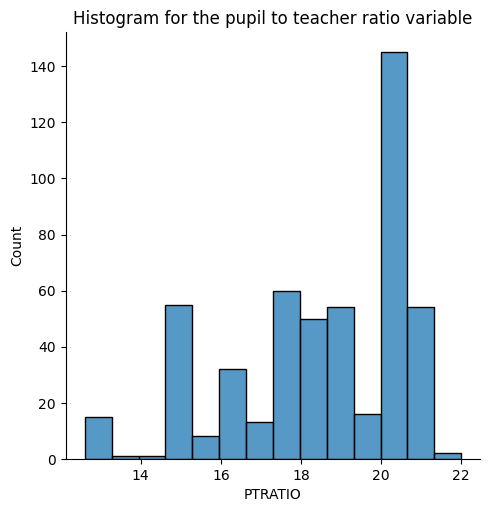

In [76]:
sns.displot(boston_df['PTRATIO'], kde = False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

This histogram shows that pupil-teacher ratio by town (PTRATIO) shows highest total count and clustered around 20 -21